In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio as rio
from rasterio.mask import mask
import os, sys
import matplotlib.pyplot as plt
import random
from shapely.geometry import LineString, Point

%matplotlib inline

In [2]:
shpfile = '../Agin_Villages.shp'
df = gpd.read_file(shpfile)
print(df.crs)

{'init': 'epsg:32736'}


## Some code for generating a point within a polygon

In [3]:
def random_point_within(poly):
    min_x, min_y, max_x, max_y = poly.bounds

    x = random.uniform(min_x, max_x)
    x_line = LineString([(x, min_y), (x, max_y)])
    x_line_intercept_min, x_line_intercept_max = x_line.intersection(poly).xy[1].tolist()
    y = random.uniform(x_line_intercept_min, x_line_intercept_max)

    return Point([x, y])

def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds

    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)

    return points


In [4]:
poly = df['geometry'][0]
min_x, min_y, max_x, max_y = poly.bounds

x = random.uniform(min_x, max_x)
x_line = LineString([(x, min_y), (x, max_y)])
#x_line_intercept_min, x_line_intercept_max = x_line.intersection(poly).xy[1].tolist()
#y = random.uniform(x_line_intercept_min, x_line_intercept_max)

a = x_line.intersection(poly)
type(a)

shapely.geometry.linestring.LineString

In [5]:
## try it
points = [random_points_within(geom,1)[0] for geom in df['geometry']]

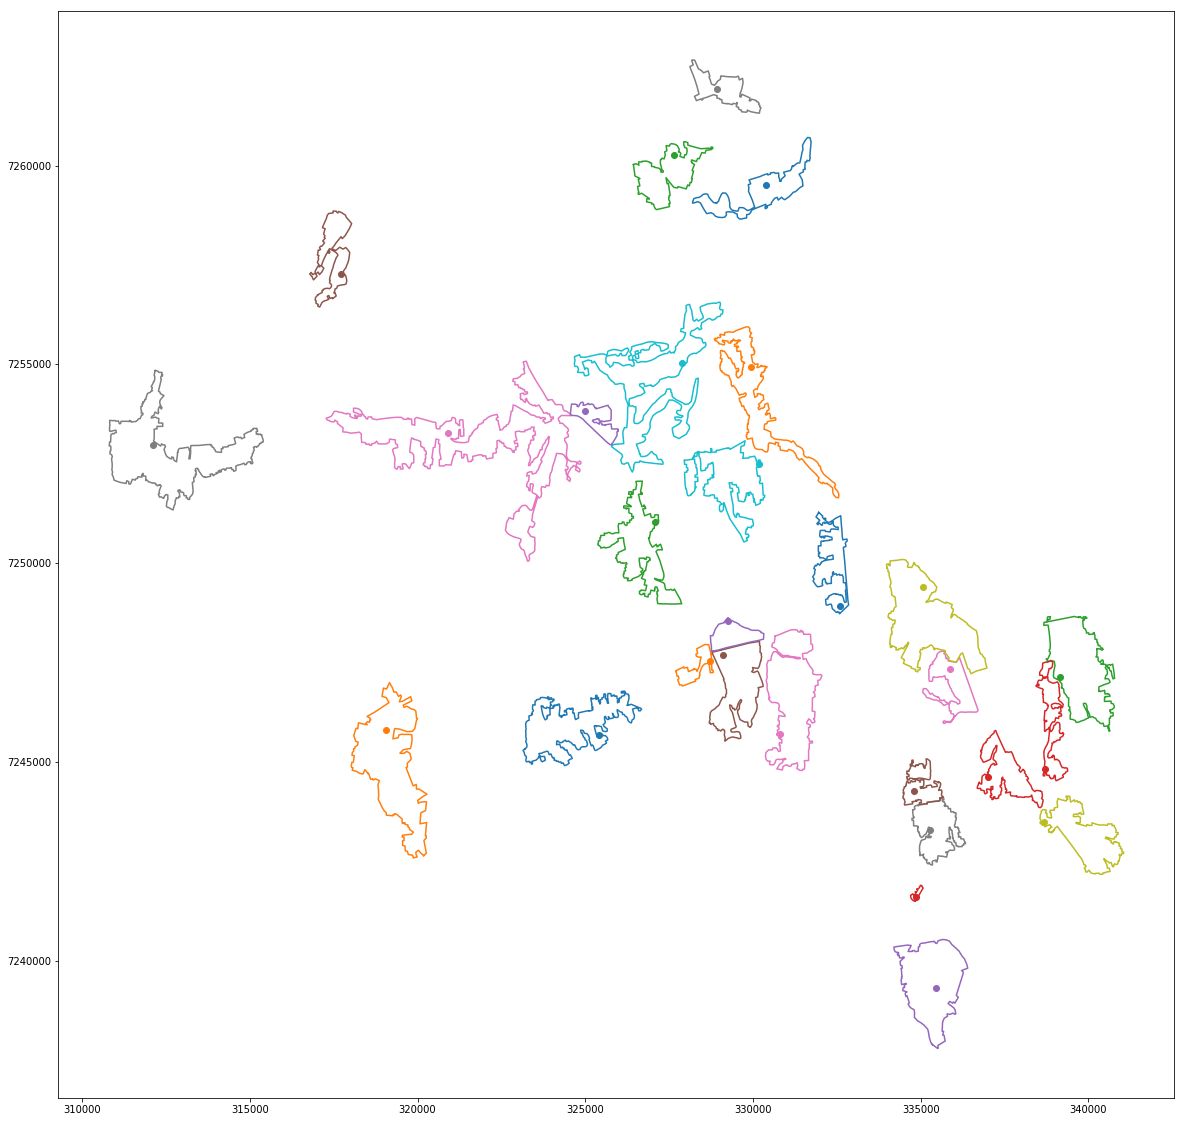

In [6]:
plt.figure(figsize=(20,20))
for i,p in enumerate(df['geometry']):
    xs, ys = zip(*p.exterior.coords) #create lists of x and y values
    plt.plot(xs,ys)
    xp,yp = points[i].coords[0]
    plt.scatter(xp,yp)
    
plt.show()

In [7]:
for i,p in enumerate(points):
    print(p.within(df['geometry'][i]))
    


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


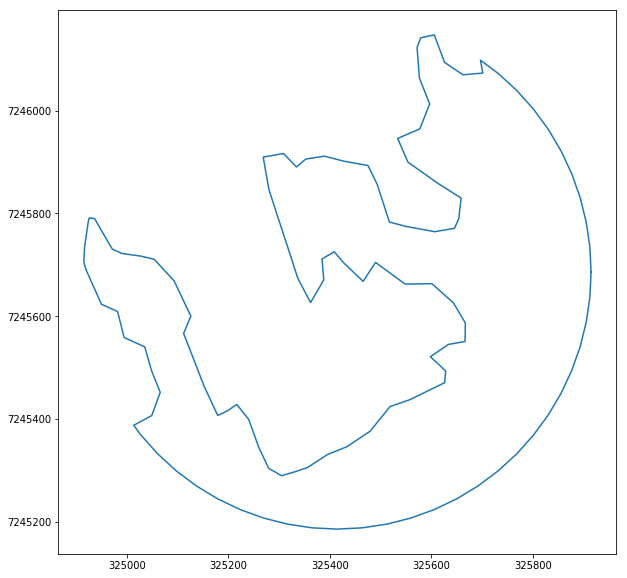

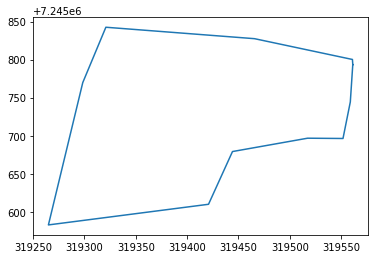

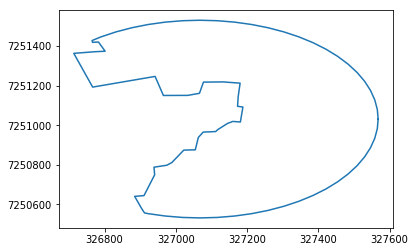

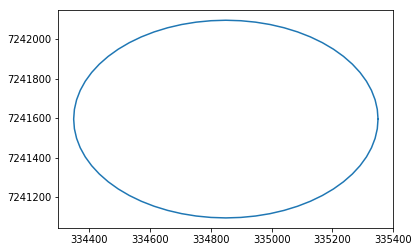

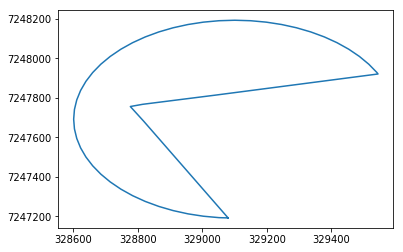

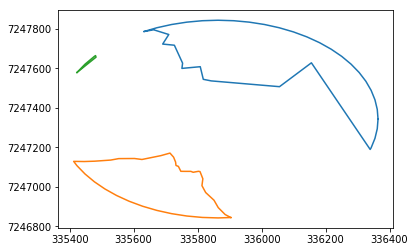

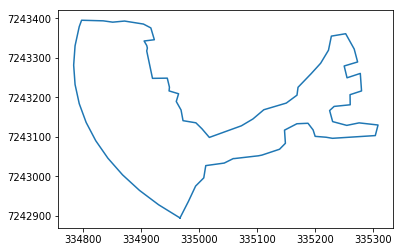

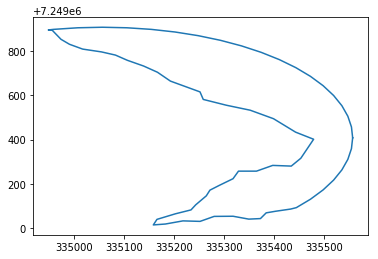

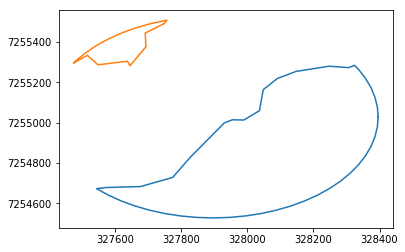

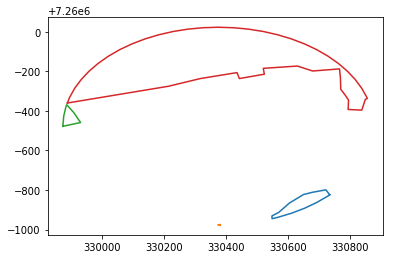

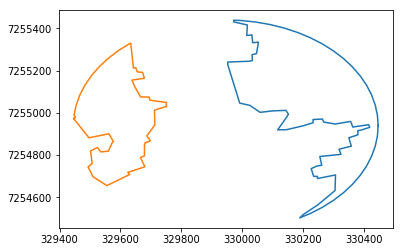

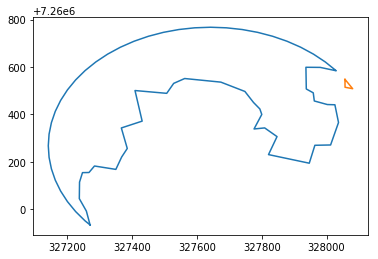

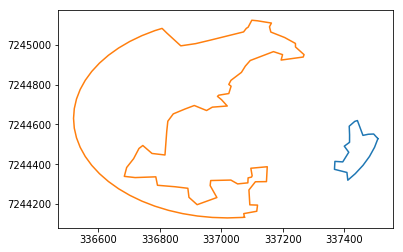

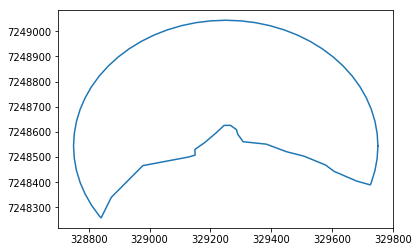

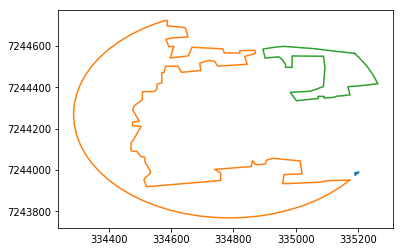

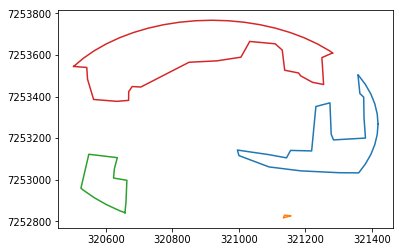

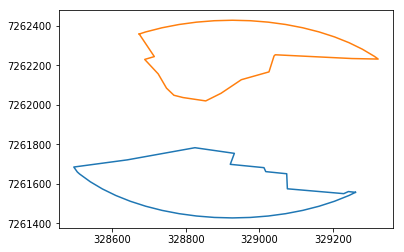

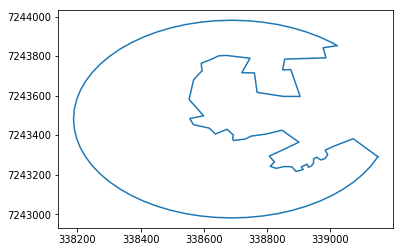

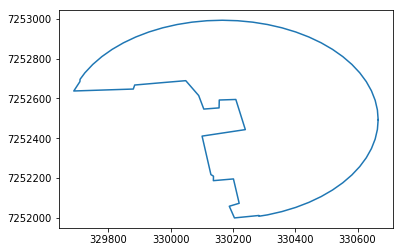

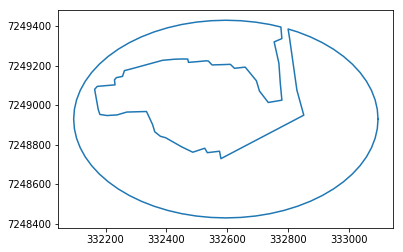

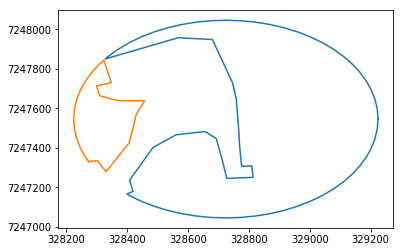

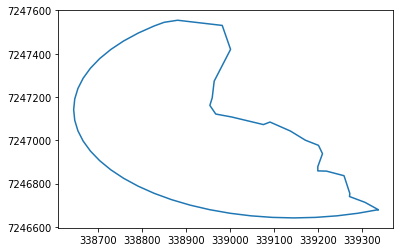

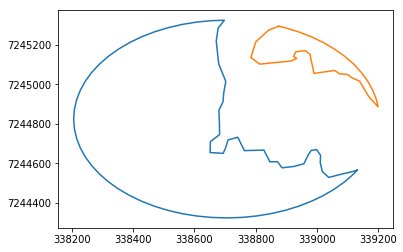

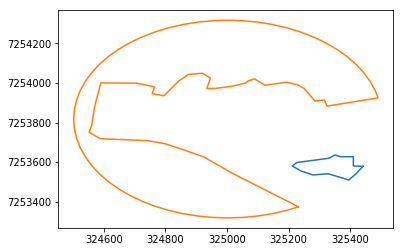

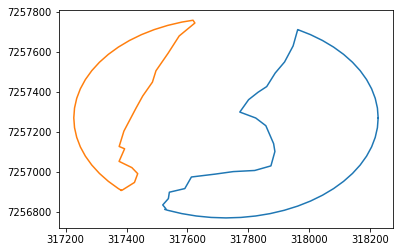

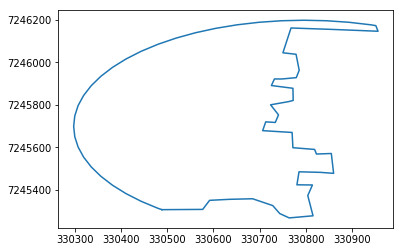

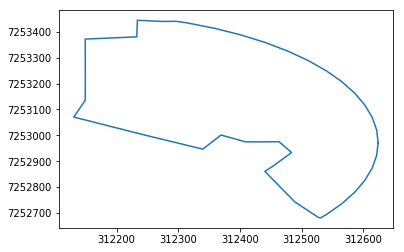

In [22]:
# show the polygon difference with a buffered geometry from the point
plt.figure(figsize=(10,10))
for i,p in enumerate(df['geometry']):
    
    p_geom = points[i].buffer(500) # buffered point
    temp = p_geom.difference(p)
    
    if temp.geom_type == 'Polygon':
        xs, ys = zip(*temp.exterior.coords) #create lists of x and y values
        plt.plot(xs,ys)
        
    else:
        for t in temp.geoms:

            xs, ys = zip(*t.exterior.coords) #create lists of x and y values
            plt.plot(xs,ys)
    
    plt.show()

In [9]:
p.geom_type == 'Polygon'

True

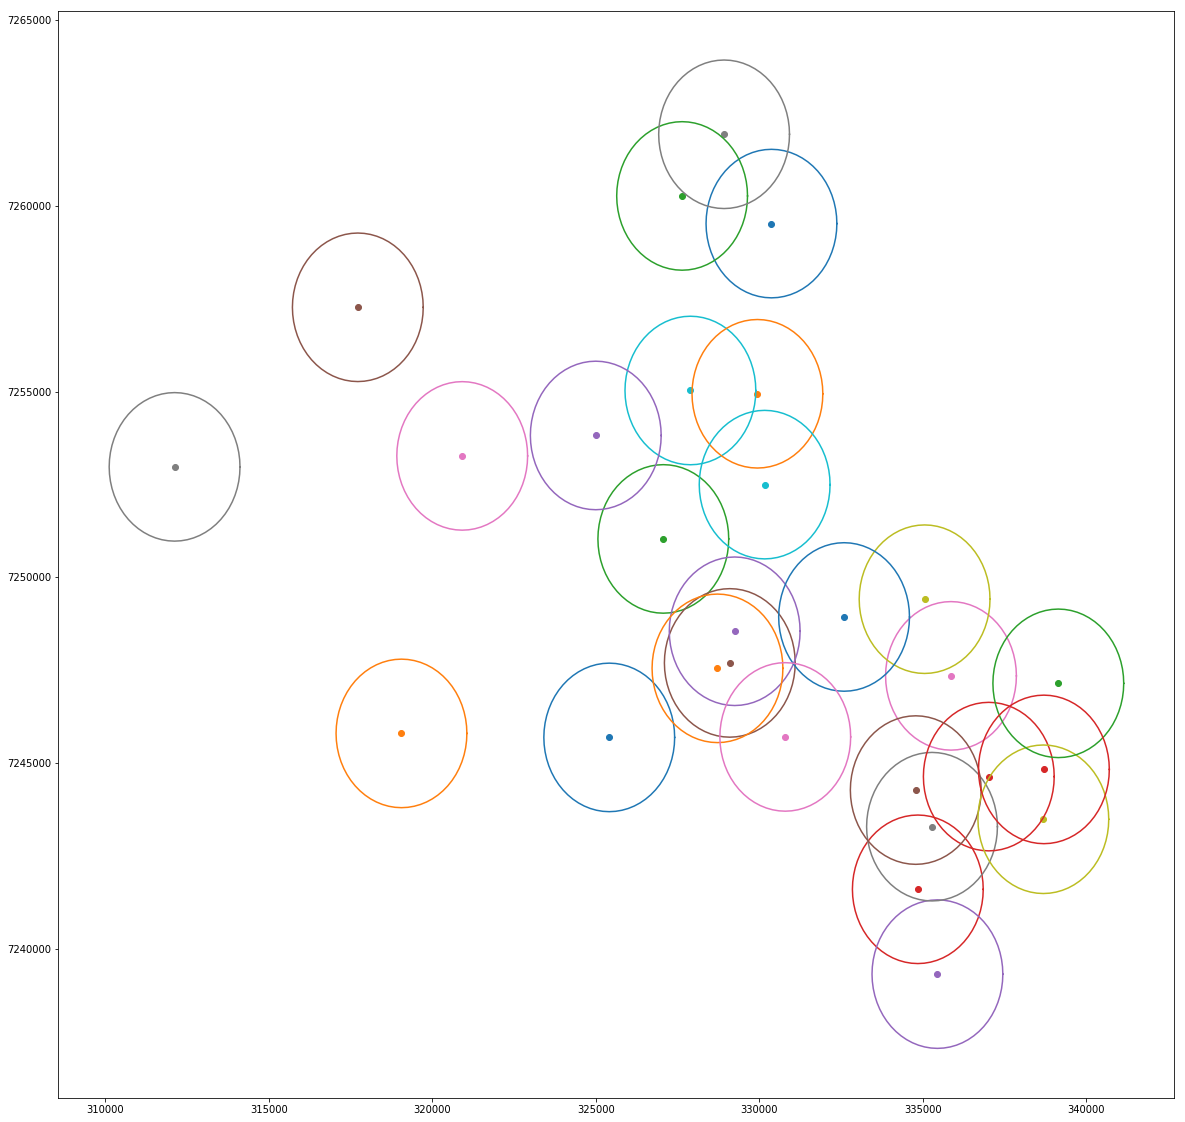

In [16]:
plt.figure(figsize=(20,20))
for i,p in enumerate(df['geometry']):
    
    p_geom = points[i].buffer(2000) # buffered point
    temp = p_geom.difference(p)
    temp = p.difference(p_geom)
    
    
    xs, ys = zip(*p_geom.exterior.coords) #create lists of x and y values
    plt.plot(xs,ys)
    
    xp,yp = points[i].coords[0]
    plt.scatter(xp,yp)
        
    
plt.show()

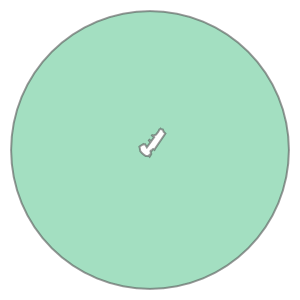

In [28]:
points[3].buffer(2000).difference(df['geometry'][3])

In [42]:
# show the polygon difference with a buffered geometry from the point
plt.figure(figsize=(10,10))
buff_dist = 2000
diffed = []
for i,p in enumerate(df['geometry']):
    
    p_geom = points[i].buffer(buff_dist) # buffered point
    temp = p_geom.difference(p)
    
    diffed.append(temp)

In [43]:
test = gpd.GeoDataFrame({'geometry':diffed})

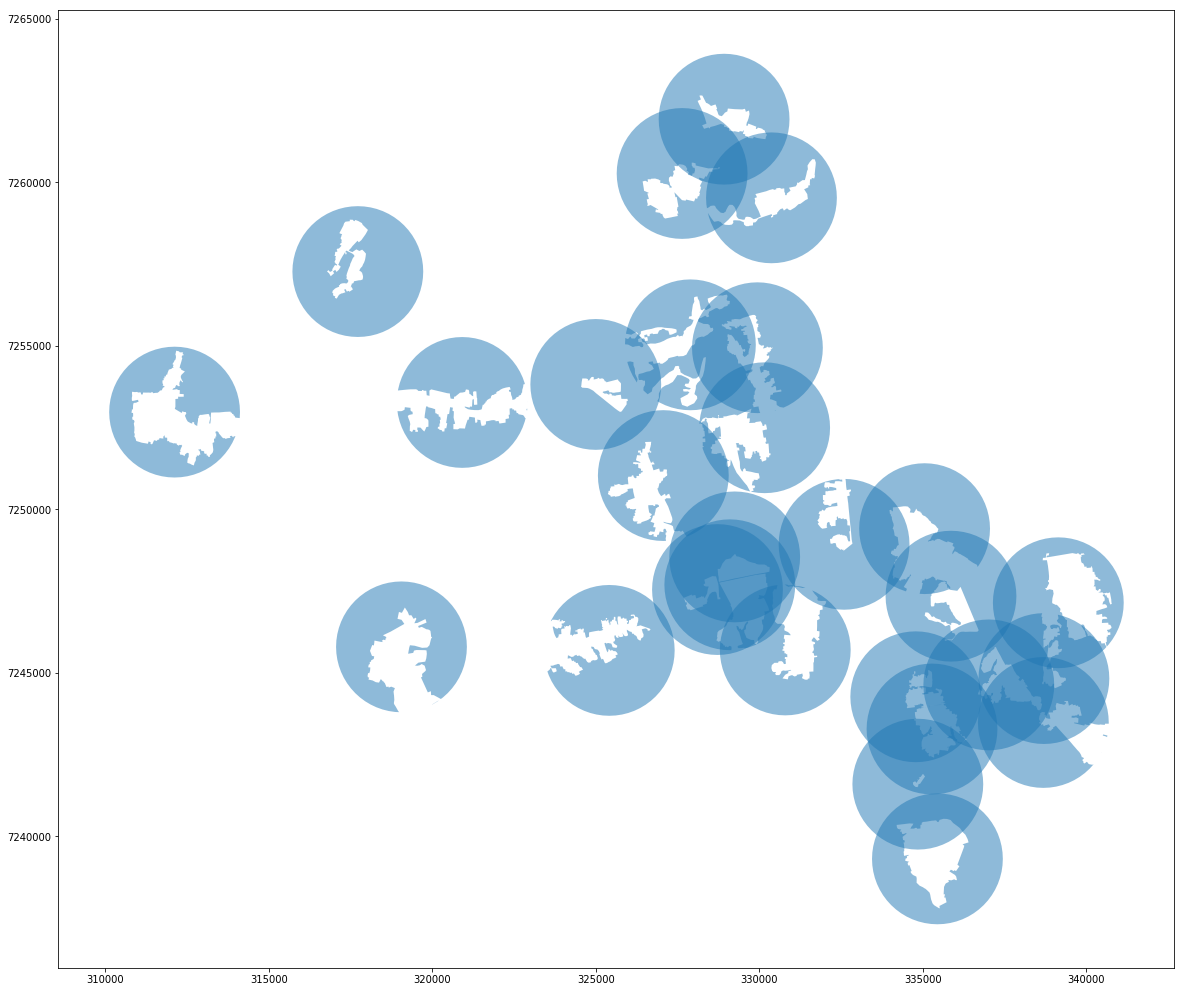

In [45]:
test.plot(figsize=(20,20), alpha=0.5)